## Exploratory data analysis

-------------------
## The MovieLens 1M dataset

This is a dataset of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata, and demographic data about the users. Such data is often of interest in the development of recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains ~1 million ratings collected from ~6,000 users on ~4,000 movies. It's spread across three tables: _ratings_, _user information_, and _movie information_. We can load each table into a pandas DataFrame object using the Python code below.

See:
https://grouplens.org/datasets/movielens/ for additional information.

In [1]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
import pandas as pd

# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('movielens/movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('movielens/movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movielens/movielens/movies.dat', sep='::',
                       header=None, names=mnames, engine='python')

Next we write Python code to answer the following questions:

1. How many users are stored in the _users_ table and what information is stored for each user?
2. How many movies are stored in the _movies_ table and what information is stored for each movie?
3. How many ratings are stored in the _ratings_ table and what information is stored for each rating?
4. How are users, the movies each user has rated, and the rating related?

*Note*: ages and occupations are coded as integers indicating _groups_ described in the dataset’s README file.

In [3]:
print("Number of users: ", len(users))
users

Number of users:  6040


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
print("Number of movies: ", len(movies))
movies

Number of movies:  3883


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
print("Number of ratings:", len(ratings))
ratings

Number of ratings: 1000209


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


1. There are 6040 users in the users table. Each user has a unique user ID, gender, age, occupation, and zip code.

2. There are 3883 movies in the movies table. Each movie has a unique movie ID, genre, and title.

3. There are 1000209 ratings in the ratings table. Each rating is mapped to a user through the user ID, and a movie through the movie ID. The table also contains the rating itself as well as a timestamp of wheen the rating was made.

4. The ratings dataset allows us to uniquely identify which users made ratings through the user ID and exactly which movies those unique users reviewed through the movie ID. 

Next we write Python code to answer the following questions:

5. What is the occupation that maps to most of the users? 
6. What percentage of users are 50 years old or older? 
7. Which movie received the highest number of ratings (and how were such ratings distributed)?
8. What is the average rating for all movies/users?

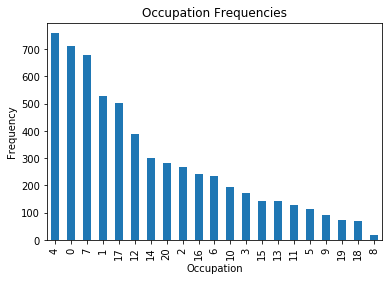

Size of most frequent occupation:  759


In [6]:
users['occupation'].value_counts().plot.bar()
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.title("Occupation Frequencies")
plt.show()

occupations=np.array(users['occupation'].value_counts())
print("Size of most frequent occupation: ", np.max(occupations))

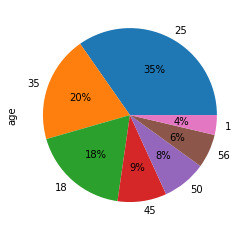

In [7]:
users['age'].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3323       1
624        1
763        1
2484       1
133        1
Name: movie_id, Length: 3706, dtype: int64
(array([2789], dtype=int64),)
American Beauty (1999)
[4 4 4 ... 5 4 4]


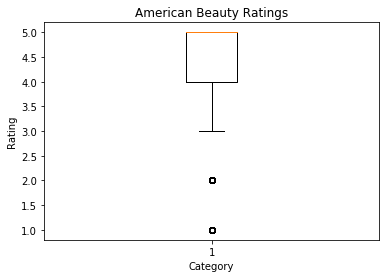

In [8]:
print(ratings['movie_id'].value_counts())
print(np.where(movies['movie_id']==2858))
print(movies['title'][2789])

most_rated_movie_indices=np.array(np.where(ratings['movie_id']==2858))
most_rated_movie_ratings=[]

for index in most_rated_movie_indices:
    most_rated_movie_ratings.append(ratings['rating'][index])

most_rated_movie_ratings=np.array(most_rated_movie_ratings)

print(most_rated_movie_ratings[0])

plt.boxplot(most_rated_movie_ratings[0])
plt.title("American Beauty Ratings")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

In [9]:
ratings_arr=np.array(ratings['rating'])
print("Average of all ratings: ", np.mean(ratings_arr))

Average of all ratings:  3.581564453029317


5. Occupation 4 is the occupation that maps to most of the users. This corresponds to college/grad student, according to the README. It occurs 759 times.

6. 14% of the users from the dataset are 50 years old or older. This is obtained by adding the percentages from age groups 50 and 56 in the pie charts below.

7. Movie 2858, or "American Beauty (1999)" received the highest number of ratings. Most ratings were distributed around the top, that is, 4s and 5s.

8. The average rating for all movies and users is approximately 3.58.

-------------------
We will use the Python code below to merge all three tables into a unified data frame.

In [10]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


The Python code below will show the top 10 films among female viewers (and, for comparison's sake, the ratings for those movies by male viewers) in decreasing order (highest rated movie on top).

In [11]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


The Python code below will:

9. Display the top 10 favorite movies among male viewers, selecting only movies with 250 ratings or more.
10. Display the top 10 favorite movies among young viewers (17 years old or younger), selecting only movies with 300 ratings or more.

In [12]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


In [13]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='age', aggfunc='mean')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 300 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 300]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_young_ratings = mean_ratings.sort_values(by=1, ascending=False)
top_young_ratings[:10]

age,1,18,25,35,45,50,56
title,,,,,,,
Metropolis (1926),4.888889,3.872340,4.079470,4.032967,4.119048,4.218750,4.187500
GoodFellas (1990),4.840000,4.457912,4.355714,4.154321,3.929134,4.084746,3.984848
"Third Man, The (1949)",4.818182,4.346939,4.402516,4.475248,4.431818,4.531250,4.500000
Double Indemnity (1944),4.777778,4.372881,4.471338,4.363057,4.460317,4.507937,4.186047
"Piano, The (1993)",4.750000,3.408451,3.696000,3.681818,3.666667,3.642857,3.920000
Fried Green Tomatoes (1991),4.750000,3.734513,3.687783,3.844828,3.879310,4.018868,4.178571
Raging Bull (1980),4.714286,4.439560,4.190114,4.148387,3.903226,4.033898,4.242424
Roman Holiday (1953),4.687500,4.290909,4.248175,4.136842,4.000000,4.146341,4.400000
Citizen Kane (1941),4.680000,4.392405,4.365854,4.400000,4.339130,4.468750,4.333333


Next we write Python code to display the most divisive movies (selecting only movies with 250 ratings or more), i.e.:

- The top 10 movies with the greatest rating difference so that we can see which ones were preferred by women.
- The top 10 movies with the greatest rating difference in the opposite direction (sign) so that we can see which ones were preferred by men.

In [14]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Add difference column
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_female_male_ratings = mean_ratings.sort_values(by='diff', ascending=True)
top_female_male_ratings[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [15]:
# Build pivot table
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')

# Add difference column
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
mean_ratings = mean_ratings.loc[active_titles]

# Fix naming inconsistency
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_male_female_ratings = mean_ratings.sort_values(by='diff', ascending=False)
top_male_female_ratings[:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Next we write Python code to display the top 10 movies (with 250 ratings or more) that elicited the most disagreement among viewers, independent of gender identification.

In [16]:
# Build pivot table
std_ratings = data.pivot_table('rating', index='title', aggfunc='std')

# Group ratings by title
ratings_by_title = data.groupby('title').size()

# Select only movies with 250 ratings or more
active_titles = ratings_by_title.index[ratings_by_title >= 250]

# Select rows on the index
std_ratings = std_ratings.loc[active_titles]

# Fix naming inconsistency
std_ratings = std_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

top_divisive_ratings = std_ratings.sort_values(by='rating', ascending=False)
top_divisive_ratings[:10]

,rating
title,
Dumb & Dumber (1994),1.321333
"Blair Witch Project, The (1999)",1.316368
Natural Born Killers (1994),1.307198
Tank Girl (1995),1.277695
"Rocky Horror Picture Show, The (1975)",1.260177
Eyes Wide Shut (1999),1.259624
Evita (1996),1.253631
Billy Madison (1995),1.249970
Fear and Loathing in Las Vegas (1998),1.246408


Next we write Python code to answer the question:

What is the most popular movie genre? 

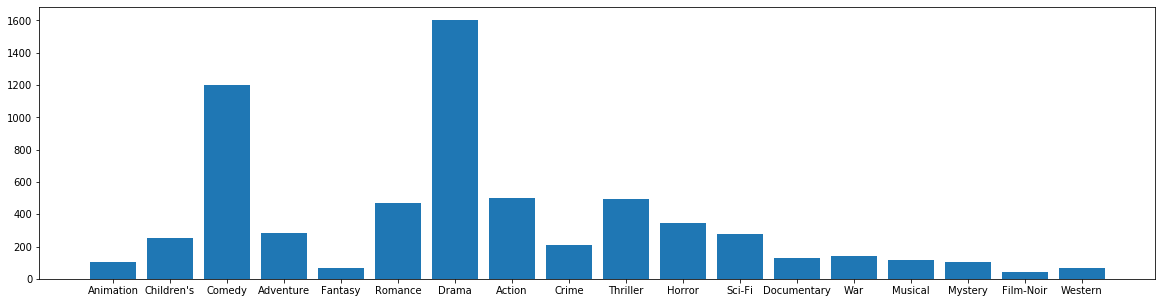

In [17]:
from collections import defaultdict

g = movies['genres'].str.split("|")
tally = defaultdict(lambda: 0)

for list_ in g:
    for item in list_:
        tally[item] +=1

plt.figure(figsize=(20,5))
plt.bar(tally.keys(), tally.values())
plt.show()

So, according to the chart above, Drama is the most popular movie genre.

------------
## The Titanic Dataset

In this part we'll use the dataset of passengers on the *Titanic*, available through the Seaborn library.

See https://www.kaggle.com/c/titanic/data for codebook and additional information.

In [18]:
titanic = sns.load_dataset('titanic')

In [19]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Next we will use the Python code below to answer the following questions (expressing the amounts in % terms):

11. How many female passengers did not survive (regardless of their class)?
12. How many first class female passengers did not survive?
13. How many male passengers did not survive (regardless of their class)?
14. How many third class male passengers did not survive?

In [20]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


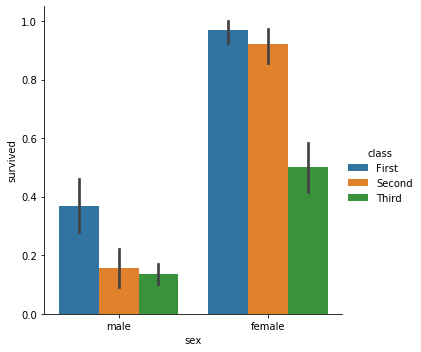

In [21]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

11. Approximately 25.8% of female passengers did not survive, regardless of their class.

12. Approximately 3.2% of female passengers in first class did not survive.

13. Approximately 81.2% of male passengers did not survive, regardless of their class.

14. Approximately 86.5% of male passengers in third class did not survive.

Next we write Python code to answer the following questions:

15. How many passengers (absolute number) were there per deck/class? 
16. How many passengers (absolute number) in Deck A survived?
17. How many passengers (absolute number) in Deck E survived and what was the breakdown (in Deck E) per class?

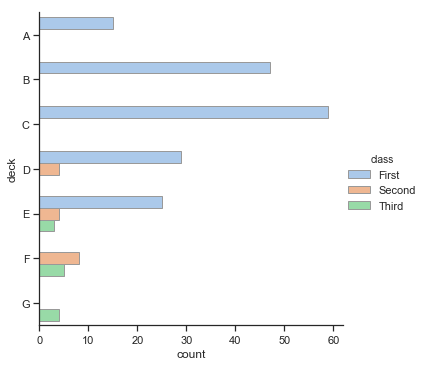

class,First,Second,Third
deck,,,
A,15.0,NaN,NaN
B,47.0,NaN,NaN
C,59.0,NaN,NaN
D,29.0,4.0,NaN
E,25.0,4.0,3.0
F,NaN,8.0,5.0
G,NaN,NaN,4.0


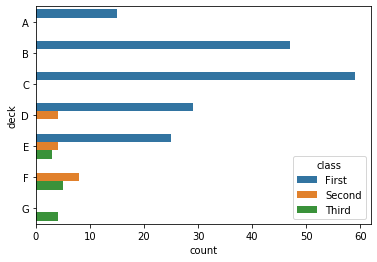

In [22]:
sns.countplot(y="deck", hue="class", data=titanic)
titanic.pivot_table('survived', index='deck', columns='class', aggfunc='count')

In [23]:
print("Surviving Deck A Passengers: \n")
titanic[titanic['deck'] == 'A'].pivot_table('survived', index='deck', columns='class', aggfunc='sum')

Surviving Deck A Passengers: 



class,First
deck,
A,7


In [24]:
print("Surviving Deck E Passengers by class: \n")
titanic[titanic['deck'] == 'E'].pivot_table('survived', index='deck', columns='class', aggfunc='sum')

Surviving Deck E Passengers by class: 



class,First,Second,Third
deck,,,
E,18,3,3


In [25]:
print("Class Breakdown in Deck E: \n")
titanic[titanic['deck'] == 'E'].pivot_table('survived', index='deck', columns='class', aggfunc='count')

Class Breakdown in Deck E: 



class,First,Second,Third
deck,,,
E,25,4,3


Next we write Python code to answer the following questions (using percentage values):

- How many women traveling alone did not survive?
- How many men 35 years old or younger did not survive?
- What was the average fare per class?

In [26]:
print("Percentage of survivors: ")

Percentage of survivors: 


In [27]:
titanic.pivot_table('survived', index='sex', columns='alone')

alone,False,True
sex,,
female,0.712766,0.785714
male,0.271084,0.155718


In [28]:
print("So, 21.5% of women traveling alone did not survive.")

So, 21.5% of women traveling alone did not survive.


In [29]:
young_men=titanic[[titanic['sex']=='male'] and titanic['age']<=35]
young_men.pivot_table('survived', index='deck', columns='class', margins=True)

class,First,Second,Third,All
deck,,,,
A,0.666667,NaN,NaN,0.666667
B,0.840000,NaN,NaN,0.840000
C,0.708333,NaN,NaN,0.708333
D,0.727273,1.0,NaN,0.769231
E,1.000000,1.0,1.000000,1.000000
F,NaN,1.0,0.000000,0.777778
G,NaN,NaN,0.500000,0.500000
All,0.785714,1.0,0.555556,0.788889


In [30]:
print("So, 21.2% of men 35 years old or younger did not survive.")

So, 21.2% of men 35 years old or younger did not survive.


In [31]:
print("Average fare per class: ")
titanic.pivot_table('fare', index='sex', columns='class', margins=True)

Average fare per class: 


class,First,Second,Third,All
sex,,,,
female,106.125798,21.970121,16.118810,44.479818
male,67.226127,19.741782,12.661633,25.523893
All,84.154687,20.662183,13.675550,32.204208


------------
## US Baby Names 1880–2018

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through the present. These plain text data files, one per year, contain the total number of births for each sex/name combination. The raw archive of these files can be obtained from http://www.ssa.gov/oact/babynames/limits.html.

In the 'names' folder, you will have a directory containing a series of files like _yob1880.txt_ through _yob2018.txt_. We need to do some data wrangling to load this dataset (see code below).

In [32]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [33]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


Next we write Python code to compute the number of baby boys and baby girls born each year and display the two line plots over time:

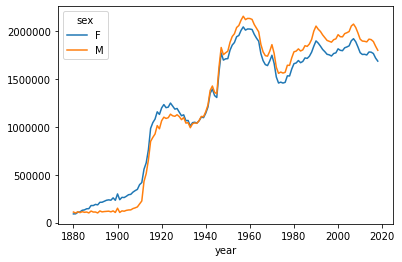

In [34]:
births_by_gender=names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
births_by_gender.plot.line()
plt.show()

-------------
## Analyzing Naming Trends

Suppose we're interested in analyzing the Top 1000 most popular baby names per year.

We will do so by following these steps:
1. Insert a column _prop_ with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name in a given year. 
2. Group the data by year and sex, then add the new column to each group.
3. Extract a subset of the data (the top 1,000 names for each sex/year combination). This is yet another group operation.
4. Split the Top 1,000 names into the boy and girl portions.
5. Build a pivot table of the total number of births by year and name.

Finally, we will plot the percentage of babies named 'John', 'Noah', 'Madison', or 'Lorraine' over time.

In [35]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [36]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1957041,Zylas,M,5,2018,0.000003
1957042,Zyran,M,5,2018,0.000003
1957043,Zyrie,M,5,2018,0.000003
1957044,Zyron,M,5,2018,0.000003


In [37]:
# Sanity check (all percentages should add up to 1, i.e., 100%)
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2016  M      1.0
2017  F      1.0
      M      1.0
2018  F      1.0
      M      1.0
Name: prop, Length: 278, dtype: float64

In [38]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [39]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
277872,Korbyn,M,207,2018,0.000115
277873,Randall,M,207,2018,0.000115
277874,Benton,M,206,2018,0.000114
277875,Coleman,M,206,2018,0.000114


In [40]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [41]:
total_births = top1000.pivot_table('births', index='year',
                                   columns='name',
                                   aggfunc=sum)

In [42]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1880 to 2018
Columns: 7174 entries, Aaden to Zyaire
dtypes: float64(7174)
memory usage: 7.6 MB


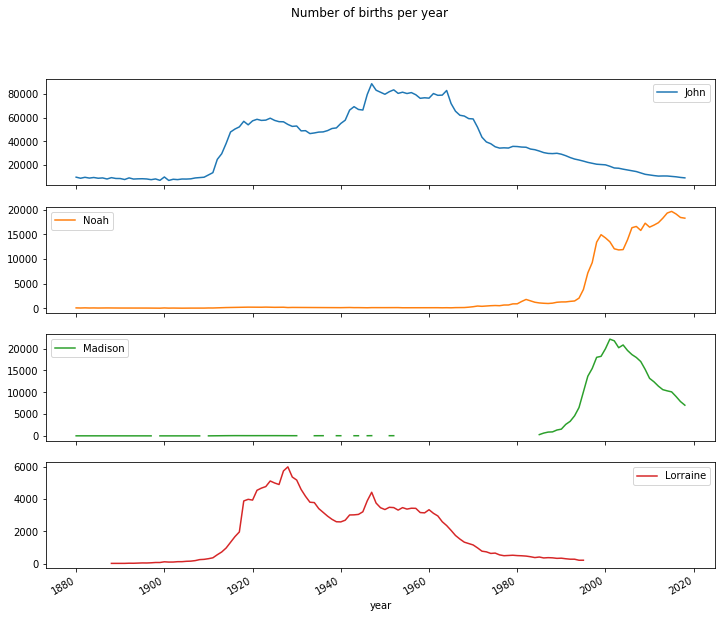

In [43]:
subset = total_births[['John', 'Noah', 'Madison', 'Lorraine']]
subset.plot(subplots=True, figsize=(12, 10), grid=False,
            title="Number of births per year")
plt.show()

-------------
## Boy names that became girl names (and vice versa)

Next, let's look at baby names that were more popular with one sex earlier in the sample but have switched to the opposite sex over the years. One example is the name Lesley or Leslie (or other possible, less common, spelling variations). 

We will do so by following these steps:
1. Go back to the top1000 DataFrame and compute a list of names occurring in the dataset starting with “lesl”.
2. Filter down to just those names and sum births grouped by name to see the relative frequencies.
3. Aggregate by sex and year and normalize within year.
4. Plot the breakdown by sex over time.

In [44]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4732     Lesli
6108     Lesly
dtype: object

In [45]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    378168
Lesly      11433
Name: births, dtype: int64

In [46]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

<Figure size 432x288 with 0 Axes>

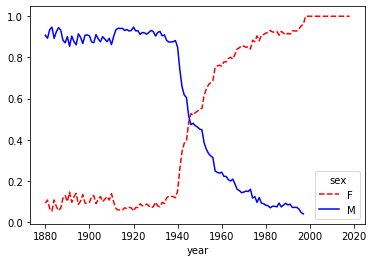

In [47]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})
plt.show()

Next we make hypothesis H2:

H2: The name 'Taylor' has become more prevalent among baby girls since 2000. 

Next we write Python code to test hypothesis H2 (and some text to explain whether it was confirmed or not):

In [48]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('taylor')]
lesley_like

1179    Taylor
dtype: object

In [49]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Taylor    430225
Name: births, dtype: int64

In [50]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table

sex,F,M
year,,
1880,NaN,1.000000
1881,NaN,1.000000
1882,NaN,1.000000
1883,NaN,1.000000
1884,NaN,1.000000
...,...,...
2014,0.845130,0.154870
2015,0.850977,0.149023
2016,0.836354,0.163646


<Figure size 432x288 with 0 Axes>

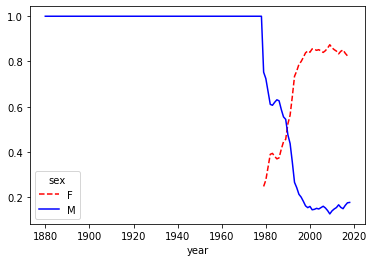

In [51]:
fig = plt.figure()
table.plot(style={'M': 'b-', 'F': 'r--'})
plt.show()

So, H2 has been proven true by the plot above.